In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Advertising.csv')

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
X=df.drop('sales',axis=1)

In [5]:
y=df['sales']

In [6]:
from sklearn.preprocessing import PolynomialFeatures

In [23]:
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)

In [24]:
my_polynomial_model.fit(X)

PolynomialFeatures(include_bias=False)

In [25]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [26]:
PolynomialFeatures(include_bias=False)

PolynomialFeatures(include_bias=False)

In [27]:
polyfeatures = polynomial_converter.transform(X)

In [28]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    polyfeatures,
    y,
    test_size=0.3,
    random_state=42
)

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
model = LinearRegression()

In [33]:
model.fit(X_train, y_train)

LinearRegression()

In [34]:
test_preds = model.predict(X_test)

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [36]:
MAE = mean_absolute_error(y_test, test_preds)

In [37]:
MSE = mean_squared_error(y_test, test_preds)

In [38]:
RMSE = np.sqrt(MSE)

In [39]:
MAE

0.5905974833808005

In [40]:
MAE

0.5905974833808005

In [41]:
RMSE

0.7233218473857531

In [42]:
model.coef_

array([ 0.05478172,  0.01311214,  0.01086391, -0.00011074,  0.00108048,
       -0.00010764,  0.00030191,  0.00017541,  0.00010075])

In [43]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [44]:
train_rmse_errors = []
test_rmse_errors = []

for degree in range(1, 10):
    polyconverter = PolynomialFeatures(
        degree=degree, 
        include_bias=False
    )
    polyfeatures = polyconverter.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        polyfeatures,
        y,
        test_size=0.3,
        random_state=42
    )
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    trainpreds = model.predict(X_train)
    testpreds = model.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train, trainpreds))
    test_rmse = np.sqrt(mean_squared_error(y_test, testpreds))
    
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)
    

In [45]:
train_rmse_errors

[1.574596830590544,
 0.5950712355838926,
 0.4688758111822088,
 0.3694689701771525,
 0.24382206827180572,
 0.19648825836034903,
 0.42552782227378116,
 0.15738640428123035,
 0.16398293372312847]

In [46]:
test_rmse_errors

[1.948537204344638,
 0.7233218473857531,
 0.5392350985707317,
 1.303226623749492,
 5.946670177318908,
 25.965472629719223,
 634.4709144546548,
 2697.77721830997,
 132859.7463155775]

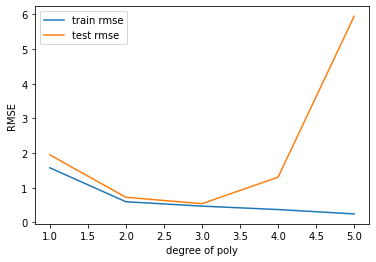

In [47]:
plt.plot(range(1, 6), train_rmse_errors[:5], label='train rmse')
plt.plot(range(1, 6), test_rmse_errors[:5], label='test rmse')

plt.xlabel('degree of poly')
plt.ylabel('RMSE')
plt.legend()

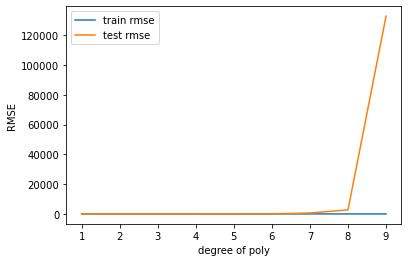

In [48]:
plt.plot(range(1, 10), train_rmse_errors, label='train rmse')
plt.plot(range(1, 10), test_rmse_errors, label='test rmse')

plt.xlabel('degree of poly')
plt.ylabel('RMSE')
plt.legend()

In [49]:
final_poly_converter = PolynomialFeatures(degree=3, include_bias=False)

In [51]:
final_model = LinearRegression()

In [60]:
full_converted_x = final_poly_converter.fit_transform(X)

final_model.fit(full_converted_x, y)


LinearRegression()

In [53]:
from joblib import dump, load

In [54]:
dump(final_model, 'final_poly_model.joblib')
dump(final_poly_converter, 'final_poly_converter.joblib')

['final_poly_converter.joblib']

In [55]:
loaded_converter = load('final_poly_converter.joblib')
loaded_model = load('final_poly_model.joblib')

In [58]:
newcampaign = [[149, 22, 12]]
transformed_x_data = loaded_converter.fit_transform(newcampaign)

In [59]:
loaded_model.predict(transformed_x_data)

array([14.64501014])